In [1]:
import pandas as pd
from library.utils import LinearRegression
import altair as alt
alt.renderers.enable('notebook')
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [2]:
data = pd.read_csv('data/avocado.csv')

In [3]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
data = data.drop('Unnamed: 0', axis = 1)
# The column is the index column

In [5]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
data['type'].value_counts()
# There are two type: conventional and organic. There numbers are similar.

conventional    9126
organic         9123
Name: type, dtype: int64

In [7]:
data['year'].value_counts()
# There are four years and the number of 2018 is especially small.

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [8]:
data['region'].value_counts()
# The numbers are balanced.

LosAngeles             338
HarrisburgScranton     338
California             338
Northeast              338
Nashville              338
BuffaloRochester       338
Houston                338
Louisville             338
Boston                 338
GrandRapids            338
Sacramento             338
NewOrleansMobile       338
Philadelphia           338
Syracuse               338
CincinnatiDayton       338
Plains                 338
Spokane                338
Indianapolis           338
SanFrancisco           338
NorthernNewEngland     338
Charlotte              338
SouthCentral           338
RichmondNorfolk        338
Boise                  338
StLouis                338
Albany                 338
HartfordSpringfield    338
Tampa                  338
TotalUS                338
GreatLakes             338
PhoenixTucson          338
MiamiFtLauderdale      338
West                   338
Portland               338
Orlando                338
LasVegas               338
Seattle                338
R

In [9]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [10]:
# drop Total Volume and Total Bags as they are the sum of the types of avocadoes and that of the bags.
data = data.drop(['Total Volume', 'Total Bags'], axis = 1)

In [11]:
# Try to drop the date
data = data.drop('Date', axis = 1)

In [12]:
model = LinearRegression(data)

In [13]:
model.fit(['4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'], 'AveragePrice',
         categorical = ['type', 'year', 'region'])

In [14]:
model.summary()

Factor                                                 Coefficient         Pr(|t|>0)      
Intercept                                              1.4533              0.0000         
4046                                                   -0.0000             0.6961         
4225                                                   -0.0000             0.0686         
4770                                                   0.0000              0.7950         
Small Bags                                             -0.0000             0.7853         
Large Bags                                             -0.0000             0.0186         
XLarge Bags                                            0.0000              0.0000         
type_conventional                                      -0.4910             0.0000         
year_2015                                              0.0301              0.0002         
year_2016                                              -0.0087             0.2815         

In [15]:
model.lack_of_fit()
# There is no lack of fit

The lack of fit cannot be measured as there are no repeated records


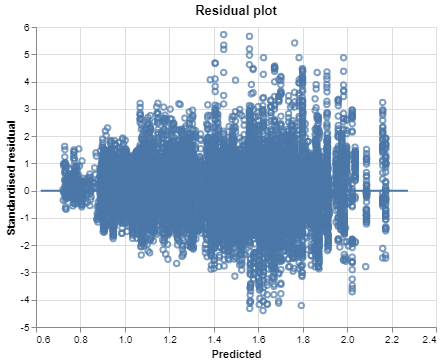

In [16]:
model.residual_plot()

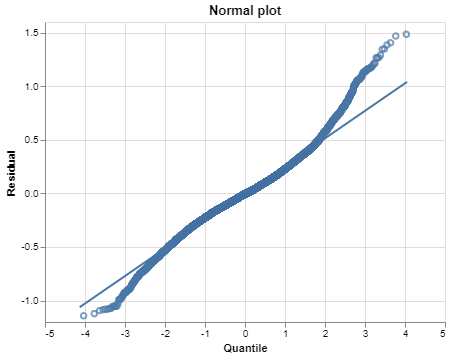

In [17]:
model.normal_plot()

In [18]:
model.normal_test()
# The normality assumption fails

Test                               Test Statistic           Pr                  
Shapiro-Wilk                       0.9791                   0.0000              
Kolmogorov-Smirnov                 0.2917                   0.0000              
D’Agostino’s K^2                   1103.1208                0.0000              


C:\Users\anson\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
